<a href="https://colab.research.google.com/github/dollytwn/nyu-python-public-policy/blob/master/HW_4_Dolly_Wei_Mei_Huang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Step 1

In [0]:
noise = df[df.complaint_type == 'Noise - Residential']
heatwater = df[df.complaint_type == 'HEAT/HOT WATER']
other = df[(df.complaint_type != 'HEAT/HOT WATER') & (df.complaint_type != 'Noise - Residential')]

In [4]:
count_noise = noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_noise))

count_heatwater = heatwater.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_heatwater))

count_other = other.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_other))

# note: we won't use count_all in the charts, but we can use it as a check that the subsets all add up to the correct total
count_all = df.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_all))

69
66
77
77


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
# this function will recode the community_board value into borocd in a new column

def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

# we can apply the function to each of our dataframes. this is the beauty of functions; you can reuse them on multiple objects!

count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_heatwater['borocd'] = count_heatwater.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [7]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_heatwater = count_heatwater[count_heatwater.borocd.isin(valid_borocds)]
print(len(count_heatwater))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [8]:
print(count_noise.head())
print(count_heatwater.head())
print(count_other.head())
print(count_all.head())

    community_board  count_of_311_requests borocd
1          01 BRONX                   3691    201
2       01 BROOKLYN                   5844    301
3      01 MANHATTAN                    722    101
4         01 QUEENS                   4589    401
5  01 STATEN ISLAND                   5052    501
    community_board  count_of_311_requests borocd
0          01 BRONX                   3346    201
1       01 BROOKLYN                   2868    301
2      01 MANHATTAN                    276    101
3         01 QUEENS                   2466    401
4  01 STATEN ISLAND                   1644    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  20316    201
2       01 BROOKLYN                  59389    301
3      01 MANHATTAN                  20261    101
4         01 QUEENS                  53370    401
5  01 STATEN ISLAND                  58449    501
    community_board  count_of_311_requests borocd
1          01 BRONX                  27353    201


In [9]:
#Bronx
27353 == 20316 + 3346 + 3691

True

In [10]:
#Brooklyn
68101 == 59389 + 2868 + 5844 

True

In [11]:
#Queens
60425 == 53370 + 2466 + 4589 

True

#Step 2
Create a stacked bar chart of 311 requests per community district. Each community district bar should be comprised of three stacked bars, one for each category listed below. The total height of each community district bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per community district.

  - number of 'Noise - Residential' complaints per community district
  - number of 'HEAT/HOT WATER' complaints per community district
  - number of other complaints per community district

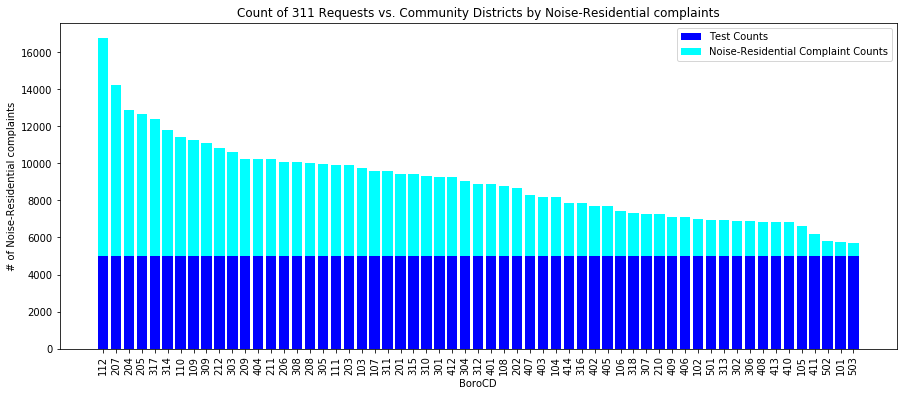

In [12]:
# number of 'HEAT/HOT WATER' complaints per community district
# list of bar positions on x axis
position_on_x = np.arange(len(count_noise))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
residentialnoise_counts = np.array(count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

# creating an array (aka list) of test data so we can easily visualize how the stacking works
test_counts = np.full(len(count_noise),5000)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  test_counts,
  align='center',
  color='blue',
  label='Test Counts'
)
# the second plot gets rendered on top of the first
plot2 = plt.bar(
  position_on_x,
  residentialnoise_counts,
  bottom=test_counts, 
  # bottom defines the starting number to which each y value will be added instead of starting at 2000
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='cyan',
  label='Noise-Residential Complaint Counts'
)
plt.xticks(position_on_x, count_heatwater.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests vs. Community Districts by Noise-Residential complaints')
plt.xlabel('BoroCD')
plt.ylabel('# of Noise-Residential complaints')
plt.legend() # defaults to putting legend in top right

plt.show()

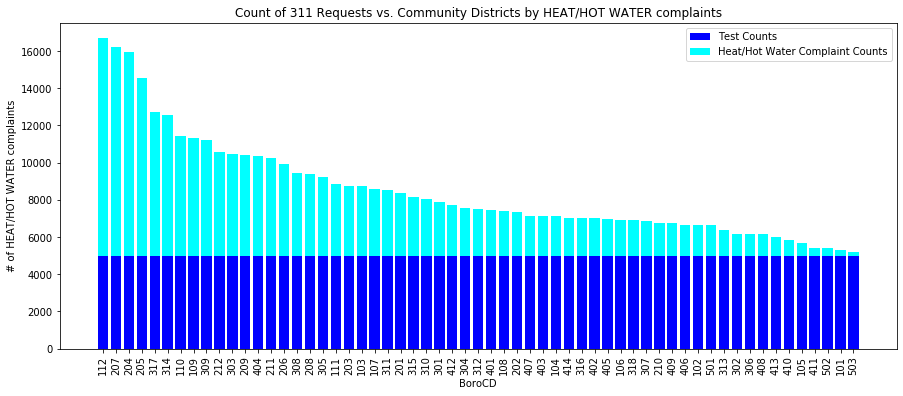

In [13]:
# number of 'HEAT/HOT WATER' complaints per community district
# list of bar positions on x axis
position_on_x = np.arange(len(count_heatwater))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
heatwater_counts = np.array(count_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

# creating an array (aka list) of test data so we can easily visualize how the stacking works
test_counts = np.full(len(count_heatwater),5000)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  test_counts,
  align='center',
  color='blue',
  label='Test Counts'
)
# the second plot gets rendered on top of the first
plot2 = plt.bar(
  position_on_x,
  heatwater_counts,
  bottom=test_counts, 
  # bottom defines the starting number to which each y value will be added instead of starting at 2000
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='cyan',
  label='Heat/Hot Water Complaint Counts'
)
plt.xticks(position_on_x, count_heatwater.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests vs. Community Districts by HEAT/HOT WATER complaints')
plt.xlabel('BoroCD')
plt.ylabel('# of HEAT/HOT WATER complaints')
plt.legend() # defaults to putting legend in top right

plt.show()

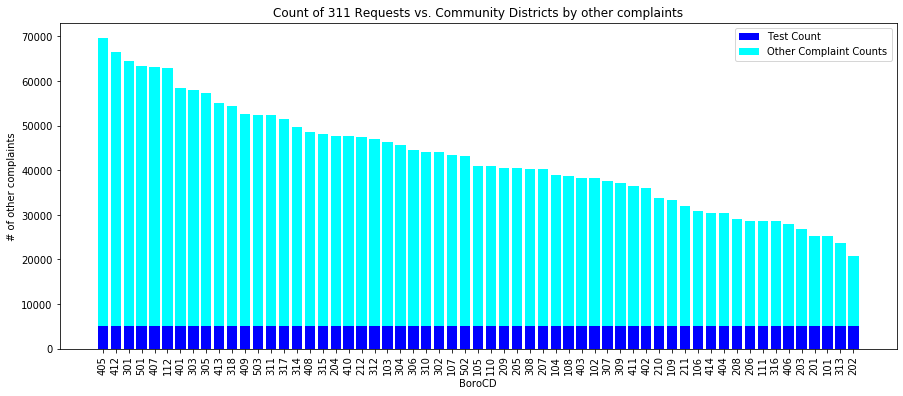

In [14]:
# number of other complaints per community district
# list of bar positions on x axis
position_on_x = np.arange(len(count_other))

# original set of counts data
# note: it's important to use np.array(series) to convert the pandas series into an array. 
# if you don't do this, the stacking won't work corectly
other_counts = np.array(count_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)

# creating an array (aka list) of test data so we can easily visualize how the stacking works
test_counts = np.full(len(count_other),5000)

plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x,
  test_counts,
  align='center',
  color='blue',
  label='Test Count'
)
# the second plot gets rendered on top of the first
plot2 = plt.bar(
  position_on_x,
  other_counts,
  bottom=test_counts, 
  # bottom defines the starting number to which each y value will be added instead of starting at 2000
  # the counts value will get added to the corresponding counts_plus_10000 value
  align='center',
  color='cyan',
  label='Other Complaint Counts'
)
plt.xticks(position_on_x, count_other.sort_values(by='count_of_311_requests', ascending=False).borocd, rotation=90)

plt.title('Count of 311 Requests vs. Community Districts by other complaints')
plt.xlabel('BoroCD')
plt.ylabel('# of other complaints')
plt.legend() # defaults to putting legend in top right

plt.show()

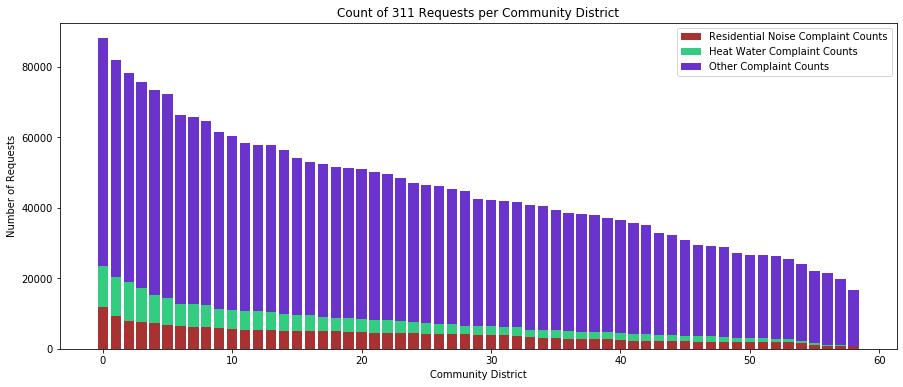

In [15]:


position_on_x1 = np.arange(len(count_noise))
position_on_x2 = np.arange(len(count_heatwater))
position_on_x3 = np.arange(len(count_other))


residentialnoise_counts = np.array(count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
heatwater_counts = np.array(count_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
other_counts = np.array(count_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)


plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x1,
  residentialnoise_counts,
  color='#a83232',
  label='Residential Noise Complaint Counts')

plot2 = plt.bar(
  position_on_x2,
  heatwater_counts,
  bottom=(residentialnoise_counts),
  color='#33cc80',
  label='Heat Water Complaint Counts')

plot3 = plt.bar(
  position_on_x3,
  other_counts,
  bottom=(residentialnoise_counts + heatwater_counts),
  color='#6933cc',
  label='Other Complaint Counts')

#plt.xticks(position_on_x1, position_on_x2, position_on_x3, residentialnoise_counts, heatwater_counts, other_counts, rotation=90)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('Community District')
plt.ylabel('Number of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

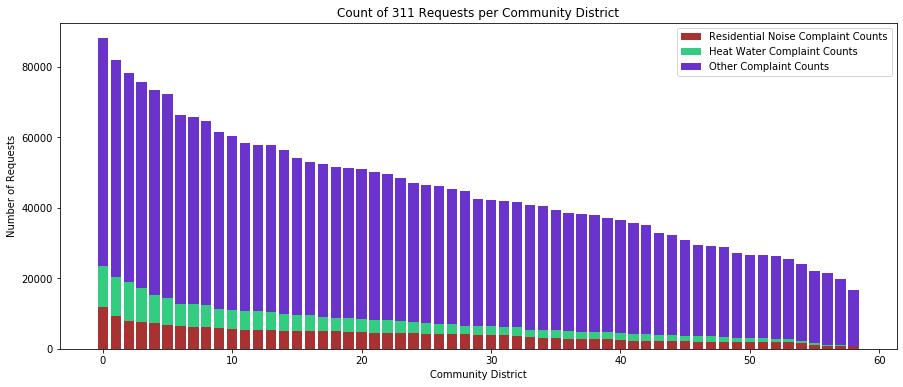

In [16]:
#experiment with xticks 
position_on_x1 = np.arange(len(count_noise))
position_on_x2 = np.arange(len(count_heatwater))
position_on_x3 = np.arange(len(count_other))


residentialnoise_counts = np.array(count_noise.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
heatwater_counts = np.array(count_heatwater.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)
other_counts = np.array(count_other.sort_values(by='count_of_311_requests', ascending=False).count_of_311_requests)


plt.figure(figsize=(15, 6))

# need to name the plots as objects in order to access their color attributes in the legend
plot1 = plt.bar(
  position_on_x1,
  residentialnoise_counts,
  color='#a83232',
  label='Residential Noise Complaint Counts')

plot2 = plt.bar(
  position_on_x2,
  heatwater_counts,
  bottom=(residentialnoise_counts),
  color='#33cc80',
  label='Heat Water Complaint Counts')

plot3 = plt.bar(
  position_on_x3,
  other_counts,
  bottom=(residentialnoise_counts + heatwater_counts),
  color='#6933cc',
  label='Other Complaint Counts')

# my goal is to show 1 per every interval of 5 
new_x1 = position_on_x1[0:-1:5]
new_x2 = position_on_x2[0:-1:5]
new_x3 = position_on_x3[0:-1:5]

new_y1 = residentialnoise_counts[0:-1:5]
new_y2 = heatwater_counts[0:-1:5]
new_y3 = other_counts[0:-1:5]

#plt.xticks(new_x1, new_y1)
#plt.xticks(new_x2, new_y2)
#plt.xticks(new_x3, new_y3)

plt.title('Count of 311 Requests per Community District')
plt.xlabel('Community District')
plt.ylabel('Number of Requests')
plt.legend() # defaults to putting legend in top right

plt.show()

#Step 3 
Using the same three dataframes created in Step 1, create a scatter plot of community district population (x-axis) vs. community district 311 counts (y-axis) split out by complaint category (noise, heat/water, other). The scatter plot should show the counts of each of the three complaint categories in a different color.

In [0]:
# Data source for population by Community District: https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2/data
# This time we'll load it directly from NYC Open Data instead of from Google Drive
# Need to merge in population dataset to get population numbers
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')

In [0]:
# Create a function recode_borocd_pop that combines and recodes the Borough and CD Number values to create a borocd unique ID

def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)

In [0]:
# merging for 'Noise - Residential' data frame
noise_merged_data = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')

# merging for 'HEAT/HOT WATER' data frame
heatwater_merged_data = pd.merge(left=count_heatwater, right=population, left_on='borocd', right_on='borocd')

# merging for 'Other' data frame
other_merged_data = pd.merge(left=count_other, right=population, left_on='borocd', right_on='borocd')

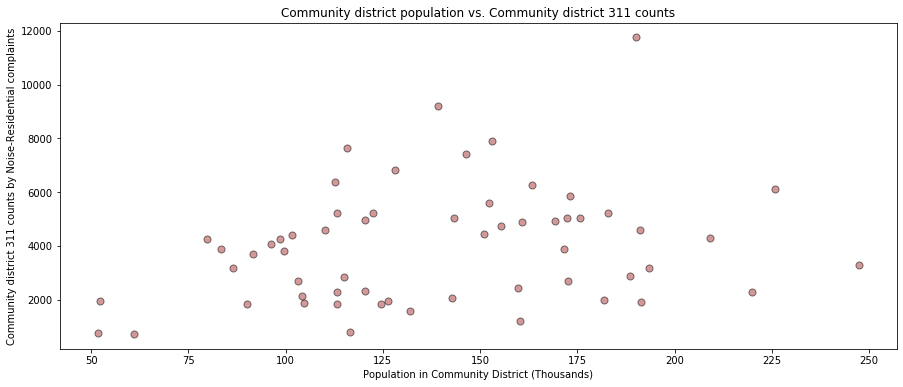

In [20]:
# define the data that will be used
#np.array
x = noise_merged_data['2010 Population']/1000
y = noise_merged_data.count_of_311_requests

# define the styling of the scatter plot
color = '#a83232' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Community district population vs. Community district 311 counts')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('Community district 311 counts by Noise-Residential complaints') 

plt.show()

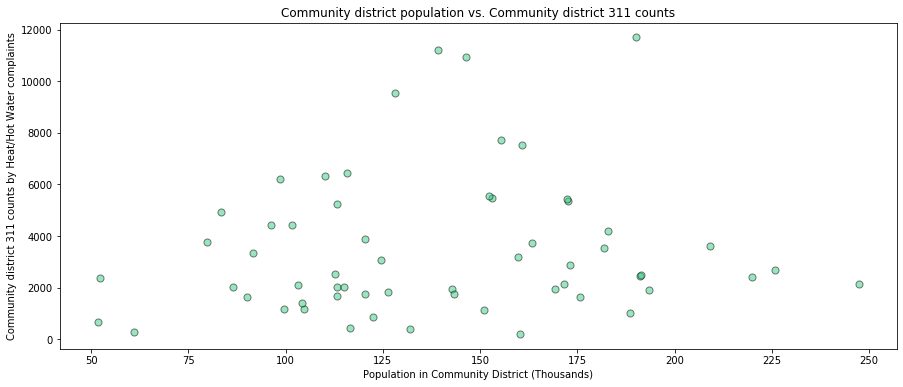

In [21]:
# define the data that will be used
#np.array
x = heatwater_merged_data['2010 Population']/1000
y = heatwater_merged_data.count_of_311_requests

# define the styling of the scatter plot
color = '#33cc80' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Community district population vs. Community district 311 counts')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('Community district 311 counts by Heat/Hot Water complaints') 

plt.show()

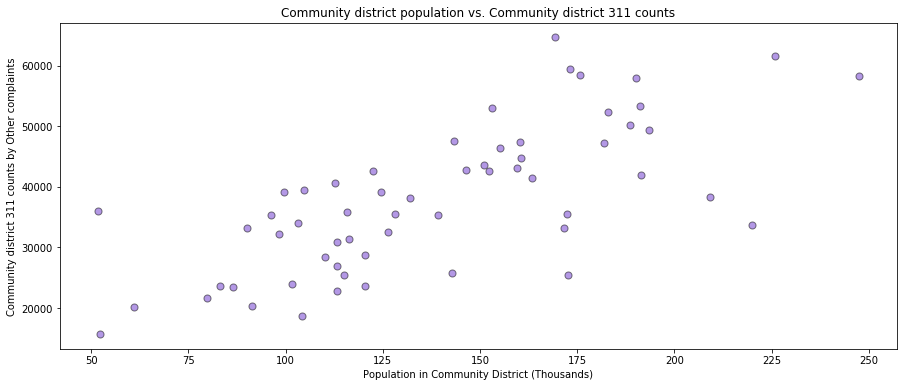

In [22]:
# define the data that will be used
#np.array
x = other_merged_data['2010 Population']/1000
y = other_merged_data.count_of_311_requests

# define the styling of the scatter plot
color = '#6933cc' # color of the circle. hex color picker: https://www.google.com/search?q=color+picker
area = 50 # area of the circle in pixels

plt.figure(figsize=(15, 6))

plt.scatter(x, y, s=area, c=color, edgecolors='black', alpha=0.5) 
# s: size, c: color
# edgecolors: outline color of the marker
# alpha: transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('Community district population vs. Community district 311 counts')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('Community district 311 counts by Other complaints') 

plt.show()

In [0]:

plt.figure(figsize=(15, 6))

x1 = noise_merged_data['2010 Population']/1000
x2 = heatwater_merged_data['2010 Population']/1000
x3 = other_merged_data['2010 Population']/1000
y1 = noise_merged_data.count_of_311_requests
y2 = heatwater_merged_data.count_of_311_requests
y3 = other_merged_data.count_of_311_requests

plt.scatter(
      x1,
      y1,
      s=area,
      c= '#a83232', 
      edgecolors='black',
      alpha=0.5,
      label='Residential Noise Complaint Counts')
  
plt.scatter(
      x2,
      y2,
      s=area,
      c= '#33cc80', 
      edgecolors='black',
      alpha=0.5,
      label='Heat Water Complaint Counts')

plt.scatter(
      x3,
      y3,
      s=area,
      c= '#6933cc', 
      edgecolors='black',
      alpha=0.5,
      label='Other Complaint Counts')


plt.title('Community district population vs. Community district 311 counts')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('Community district 311 counts by Noise-Residential complaints') 
plt.legend()
plt.show()
